In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [2]:
def split_date(df):
    df['date'] = pd.to_datetime(df['date'])
    df['WeekOfYear'] = df.date.dt.isocalendar().week
    df['dayofyear'] = pd.DatetimeIndex(df['date']).dayofyear
    df['month'] = pd.DatetimeIndex(df['date']).month
    df['weekday'] = pd.DatetimeIndex(df['date']).weekday
    df['quarter'] = pd.DatetimeIndex(df['date']).quarter
    df['is_month_start'] = pd.DatetimeIndex(df['date']).is_month_start
    df['is_month_end'] = pd.DatetimeIndex(df['date']).is_month_end

In [3]:
df = pd.read_csv('final_processed_dataset.csv', header=0, sep=',', quotechar='"')

In [4]:
df = df.drop("Unnamed: 0" , axis = 1)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   date                 730 non-null    object 
 1   day_of_data          730 non-null    int64  
 2   day_of_week          730 non-null    int64  
 3   direction_of_travel  730 non-null    int64  
 4   month_of_data        730 non-null    int64  
 5   traffic_volume       730 non-null    float64
 6   precip               730 non-null    float64
 7   windgust             730 non-null    float64
 8   windspeed            730 non-null    float64
 9   cloudcover           730 non-null    float64
 10  visibility           730 non-null    float64
 11  conditions           730 non-null    int64  
 12  holiday              730 non-null    int64  
dtypes: float64(6), int64(6), object(1)
memory usage: 74.3+ KB


In [6]:
split_date(df)

In [7]:
df['WeekOfYear'] = df['WeekOfYear'].astype(np.int64)

In [8]:

df = pd.get_dummies(df, columns=['month'], drop_first=True, prefix='month')

df = pd.get_dummies(df, columns=['weekday'], drop_first=True, prefix='wday')
df = pd.get_dummies(df, columns=['quarter'], drop_first=True, prefix='qrtr')

df = pd.get_dummies(df, columns=['is_month_start'], drop_first=True, prefix='m_start')

df = pd.get_dummies(df, columns=['is_month_end'], drop_first=True, prefix='m_end')


In [9]:

X = df.drop(["date","traffic_volume"], axis = 1)
X.head()
y = df["traffic_volume"]
y = y.reset_index().drop("index", axis=1)
y.head()
X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=0.20, random_state=44)

In [10]:
X

,day_of_data,day_of_week,direction_of_travel,month_of_data,precip,windgust,windspeed,cloudcover,visibility,conditions,...,wday_2,wday_3,wday_4,wday_5,wday_6,qrtr_2,qrtr_3,qrtr_4,m_start_True,m_end_True
0,30,3,3,6,0.03,33.8,8.1,73.8,9.7,2,...,0,0,0,0,0,1,0,0,0,1
1,29,1,3,3,0.00,22.0,8.8,78.9,9.4,1,...,0,0,0,0,1,0,0,0,0,0
2,22,1,3,11,0.00,22.0,9.3,5.7,9.9,0,...,0,0,0,0,1,0,0,1,0,0
3,17,5,3,9,0.00,18.3,12.2,45.4,9.9,1,...,0,1,0,0,0,0,1,0,0,0
4,3,5,3,12,0.00,22.0,11.7,45.9,9.9,1,...,0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,27,6,7,2,0.00,22.0,15.9,87.0,9.9,1,...,0,0,1,0,0,0,0,0,0,0
726,12,4,7,8,0.00,17.2,14.4,43.7,9.9,1,...,1,0,0,0,0,0,1,0,0,0
727,31,2,7,8,0.00,21.9,10.4,75.3,9.8,1,...,0,0,0,0,0,0,1,0,0,1
728,21,2,7,9,0.00,20.8,14.8,64.2,9.9,1,...,0,0,0,0,0,0,1,0,0,0


In [20]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)
X_test,X_valid,y_test,y_valid = train_test_split(X_test,y_test,test_size=0.2)

In [12]:
X_train.shape , X_test.shape , y_train.shape , y_test.shape

((584, 35), (116, 35), (584, 1), (116, 1))

In [13]:
print(X_train.head())
print(X_test.head())
print(y_train.head())
print(y_test.head())

     day_of_data  day_of_week  direction_of_travel  month_of_data  precip  \
438           15            1                    7              2    0.00   
136           30            6                    3              1    0.00   
398           23            6                    7              1    0.00   
363           21            2                    3              9    0.00   
82            19            1                    3              7    0.65   

     windgust  windspeed  cloudcover  visibility  conditions  ...  wday_2  \
438      22.0       10.8        37.1         9.1           1  ...       0   
136      22.0        6.7        96.4         9.8           3  ...       0   
398      22.0       10.9        34.4         9.9           1  ...       0   
363      20.8       14.8        64.2         9.9           1  ...       0   
82       22.0        9.4        70.8         8.6           2  ...       0   

     wday_3  wday_4  wday_5  wday_6  qrtr_2  qrtr_3  qrtr_4  m_start_True 

In [14]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_squared_log_error , mean_absolute_percentage_error
from sklearn.model_selection import GridSearchCV

import statsmodels.api as sm

In [15]:
# XGboost
import xgboost as xgb

xgb.set_config(verbosity=0)
tuned_parameters = [{'max_depth': [5,10, 15, 20, 25, 30],'learning_rate':[0.001, 0.01, 0.1, 0.5], 'n_estimators': [100,150,200, 250, 300]}]
MSE_xgb = ['mean_squared_error(y_test,y_pred2)']
for value in MSE_xgb:
    regr = GridSearchCV(xgb.XGBRegressor(silent = True), tuned_parameters, cv=4)
    regr.fit(X_train, y_train.values.ravel())
    y_true, y_pred2 = y_valid, regr.predict(X_valid)
    
print('The best hyper-parameters for XGBBoost are: ',regr.best_params_)

The best hyper-parameters for XGBBoost are:  {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100}


In [21]:
regr = xgb.XGBRegressor(learning_rate=0.1, max_depth=5, n_estimators=100, random_state = 0, silent = True)
regr.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=5, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [22]:
y_pred2 = regr.predict(X_test)  

In [23]:
MSE_xgb = mean_squared_error(y_test,y_pred2)
MAE_xgb = mean_absolute_error(y_test, y_pred2)
RMSLE_xgb = mean_squared_log_error(y_test, y_pred2)
MAPE_xgb = mean_absolute_percentage_error(y_test, y_pred2)

In [25]:
print('The R^2 value for XGBoost Regressor is       :', round((r2_score(y_test,y_pred2)), 3))
print('The Adjusted R2 value for XGBoost Regressor is        :', round((1 - (1-r2_score(y_test,y_pred2))*(len(y)-1)/(len(y)-X.shape[1]-1)),3))
print('The MSE value for XGBoost Regressor is        :', round(MSE_xgb));
print('The MAE value for XGBoost Regressor is        :', round(MAE_xgb));
print('The RMSE value for XGBoost Regressor is        :', round(np.sqrt(MSE_xgb)));
print('The RMSLE value for XGBoost Regressor is        :', RMSLE_xgb);
print('The MAPE value for XGBoost Regressor is        :', MAPE_xgb);

The R^2 value for XGBoost Regressor is       : 0.967
The Adjusted R2 value for XGBoost Regressor is        : 0.965
The MSE value for XGBoost Regressor is        : 95309
The MAE value for XGBoost Regressor is        : 164
The RMSE value for XGBoost Regressor is        : 309
The RMSLE value for XGBoost Regressor is        : 0.0051306833929580945
The MAPE value for XGBoost Regressor is        : 0.044064136224733624


Text(0.5, 1.0, 'Xgboost')

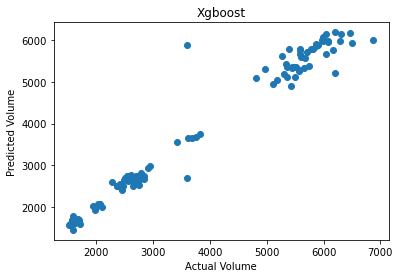

In [26]:
plt.scatter(y_test, y_pred2)
plt.xlabel("Actual Volume")
plt.ylabel("Predicted Volume")
plt.title("Xgboost")

In [27]:
# Random Forests
from sklearn.ensemble import RandomForestRegressor

tuned_parameters = [{'max_depth': [5,10, 15, 20, 50, 70], 'n_estimators': [10, 25, 50, 100,150, 200, 250]}]
MSE_rf = ['mean_squared_error(y_test, y_pred5)']
for value in MSE_rf:
    regr_rf = GridSearchCV(RandomForestRegressor(), tuned_parameters, cv=4)
    regr_rf.fit(X_train, y_train.values.ravel())
    y_true, y_pred5 = y_valid, regr_rf.predict(X_valid)
    
print('The best hyper-parameters for Random Forests are: ',regr_rf.best_params_)  

The best hyper-parameters for Random Forests are:  {'max_depth': 20, 'n_estimators': 50}


In [28]:
regr_rf = RandomForestRegressor(max_depth=20, random_state=0,
                             n_estimators=50)
regr_rf.fit(X_train, y_train.values.ravel())

RandomForestRegressor(max_depth=20, n_estimators=50, random_state=0)

In [29]:
y_pred5 = regr_rf.predict(X_test) 

In [30]:
MSE_rf  = mean_squared_error(y_test,y_pred5)
MAE_rf  = mean_absolute_error(y_test,y_pred5)
RMSLE_rf = mean_squared_log_error(y_test, y_pred5)
MAPE_rf = mean_absolute_percentage_error(y_test, y_pred5)

In [31]:
from sklearn import metrics
print('The R^2 value for Random Forest Regressor is       :', round((r2_score(y_test,y_pred5)), 3))
print('The Adjusted R2 value for Random Forest Regressor is :', round((1 - (1-r2_score(y_test,y_pred5))*(len(y)-1)/(len(y)-X.shape[1]-1)),3))
print('The MSE value for Random Forest Regressor is :', round(MSE_rf));
print('The MAE value for Random Forest Regressor is :', round(MAE_rf));
print('The RMSE value for Random Forest Regressor is :', round(np.sqrt(MSE_rf)));
print('The RMSLE value for Random Forest Regressor is        :', RMSLE_rf);
print('The MAPE value for Random Forest Regressor is        :', MAPE_rf);

The R^2 value for Random Forest Regressor is       : 0.96
The Adjusted R2 value for Random Forest Regressor is : 0.958
The MSE value for Random Forest Regressor is : 114612
The MAE value for Random Forest Regressor is : 203
The RMSE value for Random Forest Regressor is : 339
The RMSLE value for Random Forest Regressor is        : 0.008829228192598935
The MAPE value for Random Forest Regressor is        : 0.057761250546717005


Text(0.5, 1.0, 'Random Forest')

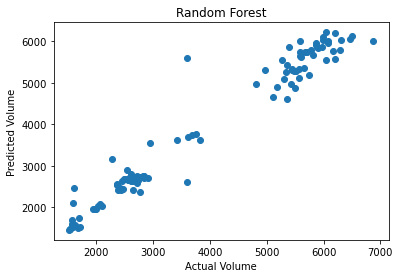

In [34]:
plt.scatter(y_test, y_pred5)
plt.xlabel("Actual Volume")
plt.ylabel("Predicted Volume")
plt.title("Random Forest")

In [ ]:
# y_pred21 = regr.predict(X_valid)  

In [ ]:
# MSE_xgb = mean_squared_error(y_valid,y_pred21)
# MAE_xgb = mean_absolute_error(y_valid, y_pred21)
# RMSLE_xgb = mean_squared_log_error(y_test, y_pred21)

In [ ]:
# print('The R2 value for XGBoost Regressor is        :', round((1 - (1-r2_score(y_test,y_pred2))*(len(y)-1)/(len(y)-X.shape[1]-1)),3))
# print('The MSE value for XGBoost Regressor is        :', round(MSE_xgb));
# print('The MAE value for XGBoost Regressor is        :', round(MAE_xgb));
# print('The RMSE value for XGBoost Regressor is        :', round(np.sqrt(MSE_xgb)));
# print('The RMSLE value for XGBoost Regressor is        :', round(RMSLE_xgb));

In [ ]:
# y_pred41 = regressor_dt.predict(X_valid)  

In [ ]:
# MSE_dt  = mean_squared_error(y_valid,y_pred41)
# MAE_dt  = mean_absolute_error(y_valid,y_pred41)
# RMSLE_dt = mean_squared_log_error(y_test, y_pred41)

In [ ]:
# print('The R2 value for Decision Tree Regressor is  :', round((1 - (1-r2_score(y_test,y_pred4))*(len(y)-1)/(len(y)-X.shape[1]-1)),3))
# print('The MSE value for Decision Tree Regressor is        :', round(MSE_dt));
# print('The MAE value for Decision Tree Regressor is        :', round(MAE_dt));
# print('The RMSE value for Decision Tree Regressor is  :', round(np.sqrt(MSE_dt)));
# print('The RMSLE value for Decision Tree Regressor is        :', round(RMSLE_dt));

In [ ]:
# y_pred51 = regr_rf.predict(X_valid) 

In [ ]:
# MSE_rf  = mean_squared_error(y_valid,y_pred51)
# MAE_rf  = mean_absolute_error(y_valid,y_pred51)
# RMSLE_rf = mean_squared_log_error(y_test, y_pred51)

In [ ]:
# from sklearn import metrics
# print('The R2 value for Random Forests Regressor is :', round((1 - (1-r2_score(y_test,y_pred5))*(len(y)-1)/(len(y)-X.shape[1]-1)),3))
# print('The MSE value for Random Forests Regressor is :', round(MSE_rf));
# print('The MAE value for Random Forests Regressor is :', round(MAE_rf));
# print('The RMSE value for Random Forests Regressor is :', round(np.sqrt(MSE_rf)));
# print('The RMSLE value for Random Forest Regressor is        :', round(RMSLE_rf));


In [ ]:
# plt.scatter(y_test, y_pred5)
# plt.xlabel("Actual Volume")
# plt.ylabel("Predicted Volume")
# plt.title("Random Forest")

In [ ]:
# df.describe()

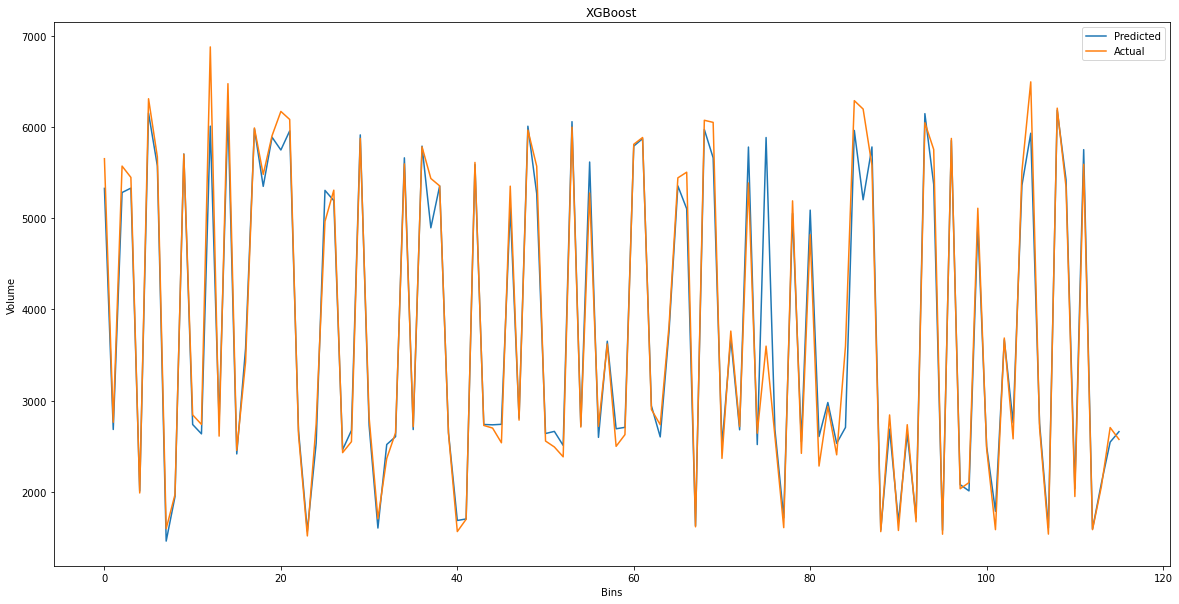

In [32]:
from matplotlib.pyplot import figure
figure(figsize=(20, 10))
plt.plot(y_pred2 , label = 'Predicted')
plt.plot(y_test.values , label = 'Actual')
plt.xlabel("Bins")
plt.ylabel("Volume")
plt.title("XGBoost")
plt.legend()

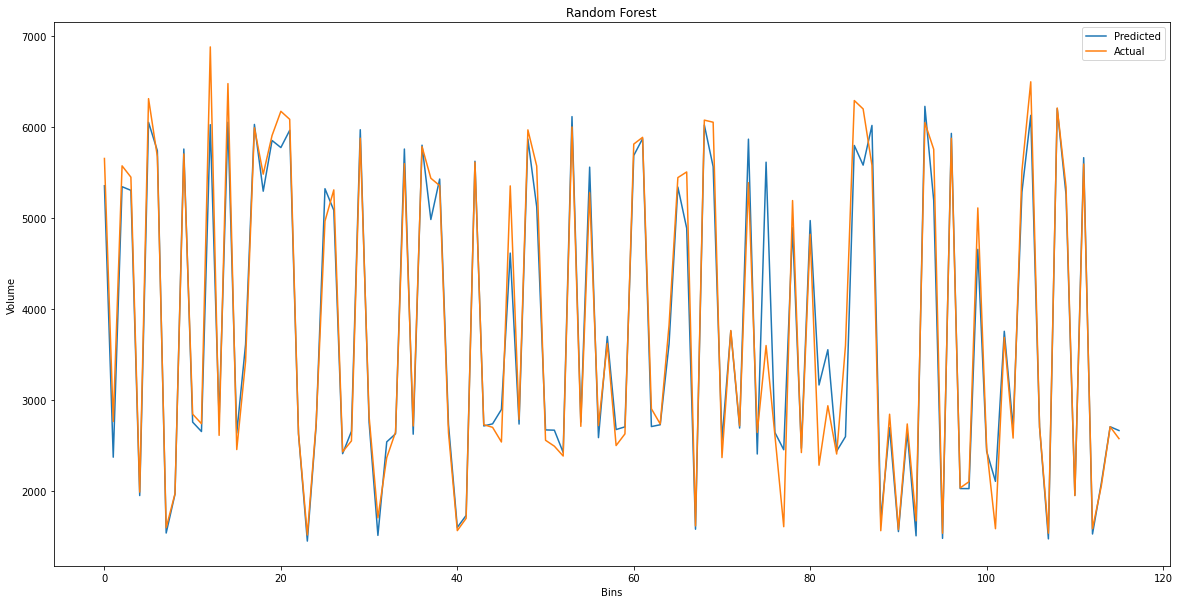

In [33]:
from matplotlib.pyplot import figure
figure(figsize=(20, 10))
plt.plot(y_pred5 , label = 'Predicted')
plt.plot(y_test.values , label = 'Actual')
plt.xlabel("Bins")
plt.ylabel("Volume")
plt.title("Random Forest")
plt.legend()